In [23]:
#useful ibraries
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [7]:
img_size = 80
count = 0
train = []
test = []
DATADIR = 'fruits-360\\'
FOLDERS = ['Training', 'Test']
CATEGORIES = ["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi","Lemon","Mango","Orange"]
for folder in FOLDERS:
    datadir = os.path.join(DATADIR, folder)
    for category in CATEGORIES:
        path = os.path.join(datadir, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            count = count+1
            try:
                if(img.endswith('.jpg')):
                    img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                    img_arr = cv2.resize(img_arr,(img_size, img_size))
                    if(folder == 'Training'):
                        train.append([img_arr,class_num])
                    if(folder == 'Test'):
                        test.append([img_arr,class_num])
            except Exception as e:
                print(e)
     

In [9]:
print(count) #total images

5767


In [8]:
print(len(train))
print(len(test))

4318
1449


# Split the datasets

In [10]:
x_train = []
x_test = []
y_train = []
y_test = []

#shuffle
random.shuffle(train)
random.shuffle(test)

for features, labels in train:
    x_train.append(features)
    y_train.append(labels)
x_train = np.array(x_train)
    
for features, labels in test:
    x_test.append(features)
    y_test.append(labels)
x_test = np.array(x_test)

In [11]:
#Reshape and normalize
x_train = x_train.reshape(-1,img_size,img_size, 1)
x_test = x_test.reshape(-1,img_size,img_size, 1)
x_train = x_train/255.0
x_test = x_test/255.0
print(x_train.shape)
print(x_test.shape)

(4318, 80, 80, 1)
(1449, 80, 80, 1)


In [12]:
#One hot encoding of Dependent variable
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 9)
y_test = to_categorical(y_test, num_classes = 9)

Using TensorFlow backend.


In [13]:
#split the dataset into train and validation sets
from sklearn.model_selection import  train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)
#now we have train, test and validation sets

# Build model

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from sklearn.metrics import confusion_matrix
import itertools
from keras.optimizers import RMSprop,Adam

model = Sequential()
model.add(Conv2D(8,(5,5), padding="Same",activation="relu",input_shape=(80,80,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(16,(4,4), padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(4,4), padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
#output layer
model.add(Dense(9,activation="softmax"))

#compile
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
              metrics = ['accuracy']
             )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
history = model.fit(x_train,y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Train on 2763 samples, validate on 691 samples
Epoch 1/10
2763/2763 [==============================] - 84s 31ms/step - loss: 0.0052 - acc: 0.9982 - val_loss: 2.4556e-04 - val_acc: 1.0000
Epoch 2/10
2763/2763 [==============================] - 24s 9ms/step - loss: 0.0030 - acc: 0.9990 - val_loss: 7.9407e-04 - val_acc: 1.0000
Epoch 3/10
2763/2763 [==============================] - 21s 7ms/step - loss: 0.0031 - acc: 0.9991 - val_loss: 0.0137 - val_acc: 0.9973
Epoch 4/10
2763/2763 [==============================] - 20s 7ms/step - loss: 0.0013 - acc: 0.9996 - val_loss: 2.5050e-04 - val_acc: 1.0000
Epoch 5/10
2763/2763 [==============================] - 20s 7ms/step - loss: 0.0084 - acc: 0.9978 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 6/10
2763/2763 [==============================] - 21s 7ms/step - loss: 0.0042 - acc: 0.9988 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 7/10
2763/2763 [==============================] - 20s 7ms/step - loss: 0.0028 - acc: 0.9991 - val_loss: 3.4808e-04 - val_acc

# Model Accuracy

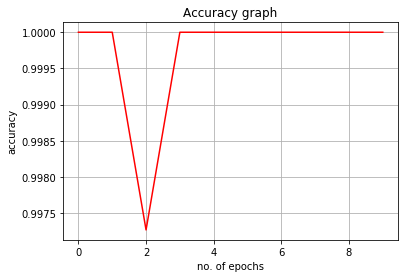

In [19]:
plt.plot(history.history["val_acc"], color = "r", label = "val_acc" )
#val_acc = how good the predictions of our model are
plt.title("Accuracy graph")
plt.xlabel("no. of epochs")
plt.ylabel("accuracy")
plt.grid()
plt.show()

# Model Accuracy

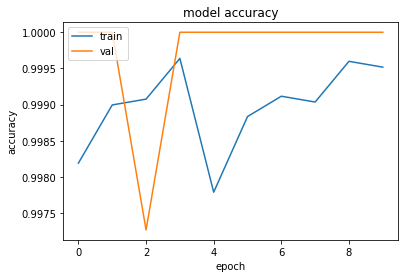

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model Loss

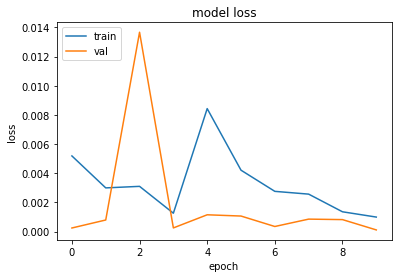

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Confusion matrix

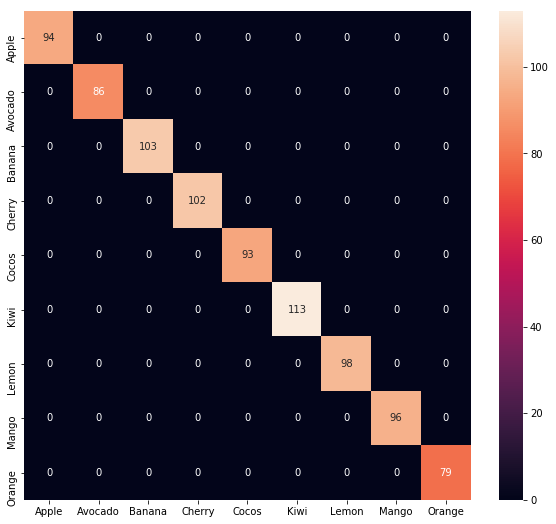

In [25]:
y_pred = model.predict(x_val)
y_predicted = np.argmax(y_pred, axis  = 1)
y_true = np.argmax(y_val, axis = 1) 
con = confusion_matrix(y_true,y_predicted)
fruits = ["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
f,ax = plt.subplots(figsize = (10,9))
sn.heatmap(con,annot = True, fmt = '.0f')
ax.set_xticklabels(fruits)
ax.set_yticklabels(fruits)
plt.show()

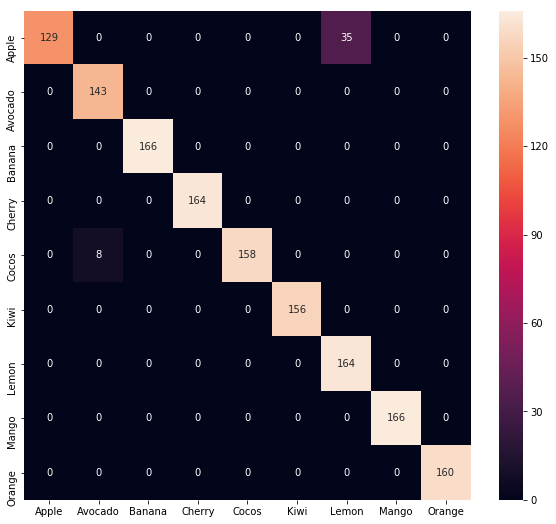

In [27]:
y_pred = model.predict(x_test)
y_predicted = np.argmax(y_pred, axis  = 1)
y_true = np.argmax(y_test, axis = 1) 
con = confusion_matrix(y_true,y_predicted)
fruits = ["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
f,ax = plt.subplots(figsize = (10,9))
sn.heatmap(con,annot = True, fmt = '.0f')
ax.set_xticklabels(fruits)
ax.set_yticklabels(fruits)
plt.show()